# How to: Set up RStudio to update Neuro-iX website

**Learning outcomes**

0. [Overview of Neuro-iX Website](#scrollTo=aedebd39-9094-464d-ae38-4c1edf7f611f)
1. [Install RStudio and some dependencies](#scrollTo=605e89f2-33b2-4dba-a2e1-fb35a17b3714)
2. [How to make changes and update](#scrollTo=5fda20fb-361e-499c-96f8-728ff6366f0e)

<a id='scrollTo=aedebd39-9094-464d-ae38-4c1edf7f611f'></a>
## 0. Overview of Neuro-iX Website

Neuro-iX website is coded using the IDE **RStudio**, **Quarto** for the libraries, and **GitHub** for the version control and deployment (special github.io
public repository).

- **Link to the website:** \
https://neuro-ix.github.io

- **Link to the GitHub repository:** \
https://github.com/Neuro-iX/Neuro-iX.github.io

<a id='scrollTo=605e89f2-33b2-4dba-a2e1-fb35a17b3714'></a>
## 1. Install RStudio and some dependencies
- **Installation of R and RStudio:**

To install and configure git and your ssh connection with GitHub, see [here](https://colab.research.google.com/github/Neuro-iX/Tutorials/blob/main/Tutorial_1_NewMember/Tutorial_1_NewMember.ipynb#scrollTo=3877d880-4c49-4093-9b69-3cdfe6462132).

Then, clone the GitHub repository:
```bash
cd ~/Documents
git clone git@github.com:Neuro-iX/Neuro-iX.github.io.git
cd Neuro-iX.github.io
```

Depending your OS, follow the instructions for [RStudio installation](https://posit.co/download/rstudio-desktop/).
  
In the case of **Ubuntu 22.04**, install R first using:
```bash
# update indices
sudo apt update -qq
# install two helper packages we need
sudo apt install --no-install-recommends software-properties-common dirmngr
# add the signing key (by Michael Rutter) for these repos
# To verify key, run gpg --show-keys /etc/apt/trusted.gpg.d/cran_ubuntu_key.asc 
# Fingerprint: E298A3A825C0D65DFD57CBB651716619E084DAB9
wget -qO- https://cloud.r-project.org/bin/linux/ubuntu/marutter_pubkey.asc | sudo tee -a /etc/apt/trusted.gpg.d/cran_ubuntu_key.asc
# add the R 4.0 repo from CRAN -- adjust 'focal' to 'groovy' or 'bionic' as needed
sudo add-apt-repository "deb https://cloud.r-project.org/bin/linux/ubuntu $(lsb_release -cs)-cran40/"

sudo apt install --no-install-recommends r-base
```

Then, install RStudio using:
```bash
wget  "https://download1.rstudio.org/electron/jammy/amd64/rstudio-2024.04.2-764-amd64.deb" -O /tmp/rstudio.deb
sudo dpkg -i /tmp/rstudio.deb

rstudio #Open RStudio
#Open the project Neuro-iX.github.io.Rproj
```

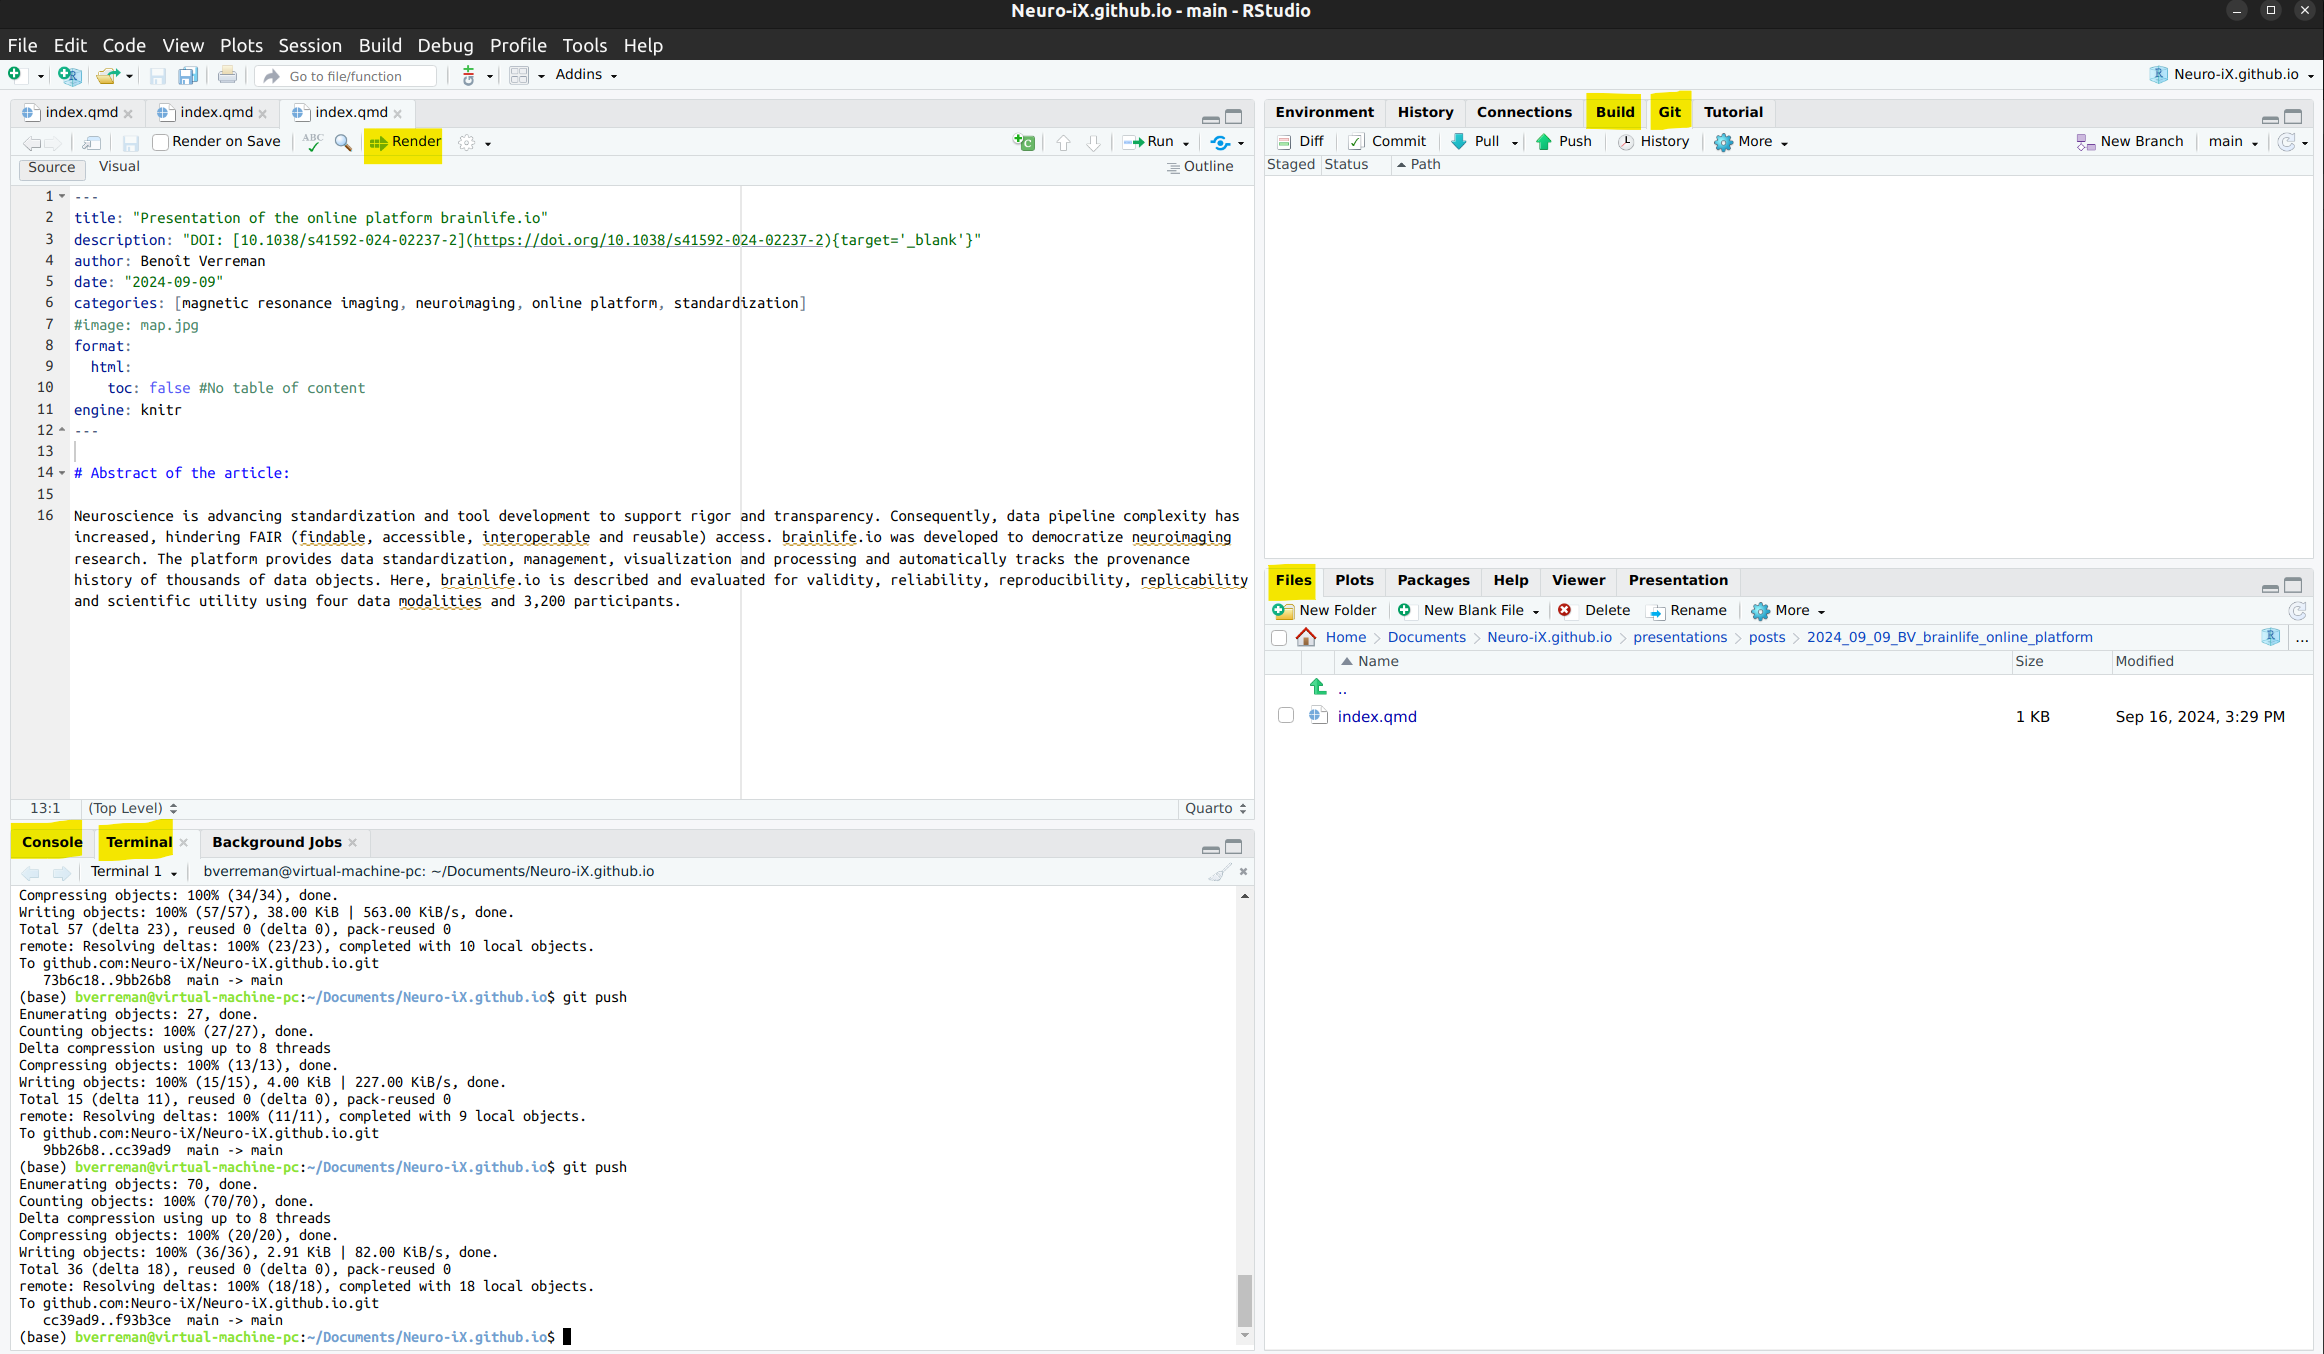

- **Install the dependencies in RStudio, git clone and open project:**

In **RStudio console**:
```bash
install.packages("knitr")
install.packages("rmarkdown")
#takes 10min
```

In **RStudio terminal**:
```bash
pip install tkinter-tooltip lxml yattag Unidecode yake
```

- **Each time you open RStudio, configure the GitHub ssh connection in the RStudio terminal:**
```bash
eval $(ssh-agent -s) #Instantiate a ssh-agent
ssh-add ~/.ssh/id_ed25519 #Change this for the path to your private key. Enter your passphrase if you configured one.
#ssh -T git@github.com #test your connection
#alias graph='git log --all --decorate --oneline --graph' #Useful alias/command 'graph' to check the different commited versions of both main (GitHub repo) and origin (local folder)
```

<a id='scrollTo=5fda20fb-361e-499c-96f8-728ff6366f0e'></a>
## 2. How to make changes and updates

- **Files structure:**

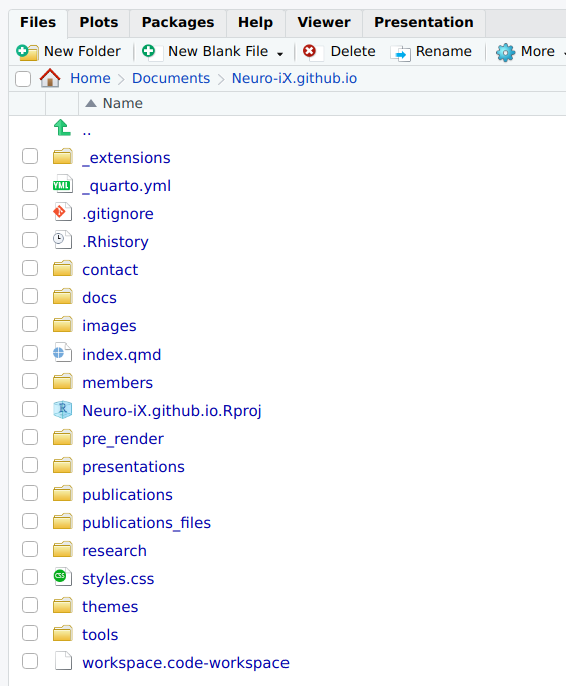

Each web page has a markdown script called **index.qmd**, using **Quarto** libraries. \
When rendering, each of thoses scripts generate a web page index.htlm in the **docs** folder. \
Each tab has its own folder with the same name.

**yml** files are fused for overall website structure, and **css** files are used for cosmetics (colors, font size, etc.).

- **Pre-rendering or rendering from scratch:**

**Rendering is necessary before any commit** (to compile the html files in docs). \
You can either render from scratch in section '**Build/Render Website**' (launch my script pre-render/posts_generator.py for webscraping and posts scripts creation), \
or click on the button '**Render**' to only generate the html files.

Rendering automatically open a new tab in your browser, to show a preview of the website.

- **Commit and push**

In '**Git**' section (or 'Tools/Version Control/Commit...'), click on 'Commit', select all modified files with Ctrl+A, click on 'Stage', add a commit message to explain the changes, and 'Commit'. \
Then, to update the GitHub repo, enter in the **RStudio terminal**:
```bash
git push
```

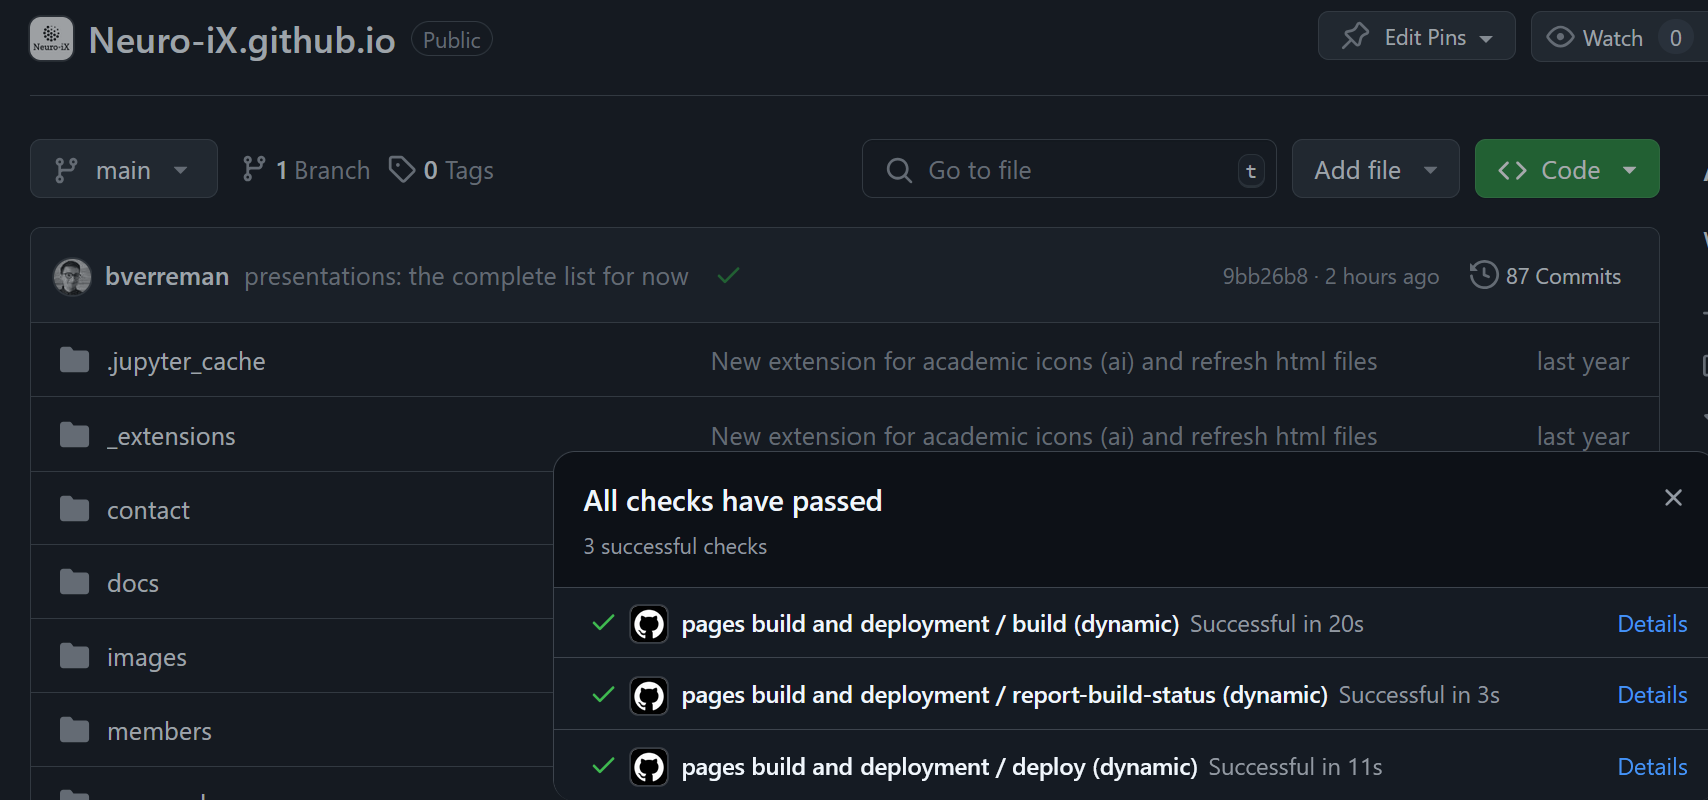

The GitHub repository automatically deploy the new version of the website.  \
It can take a few minutes.